In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data
dateparse = lambda x: pd.to_datetime(x, unit='s')
city_df = pd.read_csv('docs/assets/data/cities.csv', parse_dates=['Date'], date_parser=dateparse)

In [2]:
city_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,jacareacanga,0,BR,2018-06-13 15:00:00,62,-6.22,-57.76,89.60,6.93
1,1,kaitangata,100,NZ,2018-06-13 15:55:04,94,-46.28,169.85,42.61,5.64
2,2,goulburn,20,AU,2018-06-13 15:51:18,91,-34.75,149.72,44.32,10.11
3,3,lata,76,IN,2018-06-13 15:55:05,89,30.78,78.62,59.89,0.94
4,4,chokurdakh,0,RU,2018-06-13 15:55:06,88,70.62,147.90,32.17,2.95


# Exloratory Analysis

In [3]:
city_df.describe()

,City_ID,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
count,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,273.00000,42.166362,70.349177,21.066051,17.467495,67.870512,8.593583
std,158.04957,35.620143,23.450997,33.360137,88.441615,16.750916,5.736229
min,0.00000,0.000000,5.000000,-54.810000,-179.170000,25.690000,0.720000
25%,136.50000,1.000000,55.500000,-5.615000,-61.405000,55.400000,3.740000
50%,273.00000,40.000000,74.000000,26.190000,19.240000,70.420000,7.310000
75%,409.50000,75.000000,89.500000,50.035000,92.485000,79.870000,12.065000
max,546.00000,100.000000,100.000000,78.220000,179.320000,112.450000,32.930000


In [4]:
city_df = city_df.sort_values('Lat')

In [5]:
# Get the comparison columns
numerical_df = city_df.select_dtypes(include=['float64','int64'])

In [6]:
# Make a correlation matrix
corr_df = numerical_df.corr()['Lat']
corr_df

City_ID       0.054532
Cloudiness    0.009084
Humidity     -0.136142
Lat           1.000000
Lng          -0.073901
Max Temp     -0.167460
Wind Speed    0.024698
Name: Lat, dtype: float64

In [7]:
sns.set(style="darkgrid")

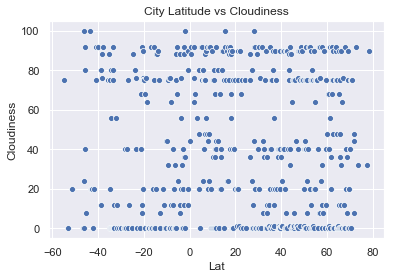

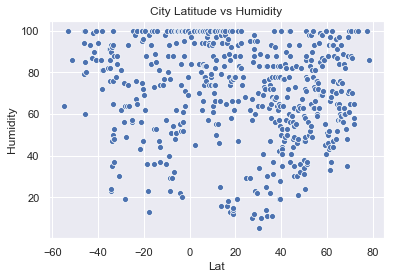

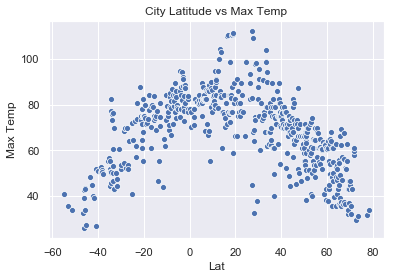

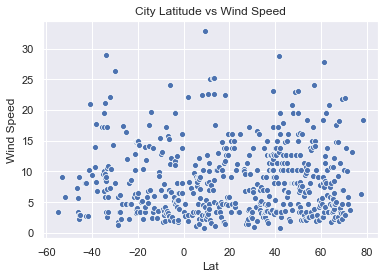

In [8]:
# Create some plots
cols_of_interest = ['Cloudiness', 'Humidity', 'Max Temp', 'Wind Speed']
# g = sns.pairplot(numerical_df, x_vars=['Lat'], y_vars=cols_of_interest)
for idx, col in enumerate(cols_of_interest):
    plt.figure()
    g = sns.scatterplot(data=numerical_df, x='Lat', y=col)
#     fig = g.get_figure()
    g.set_title(f'City Latitude vs {col}')
    g.get_figure().savefig(f'docs/images/viz{idx+1}.png', dpi=300)